# This jupyter notebook test the VERT_FSFB3.py function with a sample $N^2$ profile in the California coastal region

## This notebook also demonstrates that the input vertical coordinate can be mid-point depth instead of mid-point pressure.

In [394]:
import numpy as np
import scipy
import gsw
import xarray as xr
import cmocean as cmo
from numpy import linalg as LA

In [395]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# First we calculate the Brunt-Vaisla frequency squared with a sample dataset.

In [396]:
import numpy as np
import scipy
import gsw
import xarray as xr
import cmocean as cmo
from numpy import linalg as LA
from scipy import linalg

In [397]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [398]:
state_ds = xr.open_dataset('./SWOT_state_2015-01-06.nc')
state_ds

<xarray.Dataset>
Dimensions:  (Z: 90, YC: 300, XC: 300)
Coordinates:
  * Z        (Z) float32 -0.5 -1.57 -2.79 ... -5.882e+03 -6.301e+03 -6.76e+03
  * XC       (XC) float32 230.0 230.0 230.1 230.1 ... 236.2 236.2 236.2 236.2
  * YC       (YC) float32 31.01 31.03 31.05 31.07 ... 37.17 37.19 37.21 37.23
Data variables:
    THETA    (Z, YC, XC) float32 ...
    SALT     (Z, YC, XC) float32 ...
    PHIHYD   (Z, YC, XC) float32 ...
    Depth    (YC, XC) float32 ...
Attributes:
    description:  Data sample of the vertical profiles of Temperature, Salini...

In [6]:
LAT, LON = state_ds.YC.data, state_ds.XC.data

In [7]:
lat, lon = np.meshgrid(LAT, LON)

# Read Temperature, Salinity and Pressure data

In [8]:
temp = state_ds.THETA
salinity = state_ds.SALT
pres  = state_ds.PHIHYD

In [9]:
Z = state_ds.Z
#gsw.stability.Nsquared?

In [10]:
ls

CER00_VERT_FSFB3-N2-constant-removeBT.ipynb
CER00_VERT_FSFB3-N2-constant.ipynb
CER01_VERT_FSFB3.ipynb
CER02_VERT_FSFB3-function-usage.ipynb
README.md
SWOT_state_2015-01-06.nc
VERT_FSFB2.m
VERT_FSFB3.m
VERT_FSFB3.py
rossby_wave_vert.py


# Calculate Brunt-Vaisla frequency squared

In [11]:
SA, CT, = np.ma.masked_all(salinity.shape), np.ma.masked_all(temp.shape)
Nsquared = np.ma.masked_all([salinity.shape[0]-1,salinity.shape[1], salinity.shape[2]])
Pressure_mid = np.ma.masked_all([salinity.shape[0]-1,salinity.shape[1], salinity.shape[2]])
Z_mid = np.ma.masked_all([salinity.shape[0]-1, salinity.shape[1], salinity.shape[2]])
for y in range(SA.shape[1]):
    for x in range(SA.shape[2]):
        SA[:, y, x] = gsw.conversions.SA_from_SP(salinity.data[:, y, x], pres.data[:, y, x], LON[x], LAT[y])
        CT[:, y, x] = gsw.CT_from_pt(SA.data[:, y, x], temp.data[:, y, x])  
        Nsquared[:, y, x], Pressure_mid[:, y, x] = gsw.stability.Nsquared(SA[:, y, x], CT[:, y, x], pres[:, y, x])
        Z_mid[:, y, x] = gsw.z_from_p(Pressure_mid[:, y, x] , lat = LAT[y])

/Users/yugao/opt/anaconda3/envs/pyenv/lib/python3.8/site-packages/gsw/stability.py:85: RuntimeWarning: divide by zero encountered in true_divide
  N2 = ((g_local**2) / (specvol_mid * db_to_pa * dp))


In [12]:
Nsquared.shape

(89, 300, 300)

In [13]:
xlon, ylat = np.meshgrid(LON, LAT)

In [14]:
zz, yy = np.meshgrid(Z[1:], LAT)

# Choose a vector at a random location

In [202]:
laty, lonx = 160, 100

Text(0.5, 1.0, 'Depth = 4836.0005')

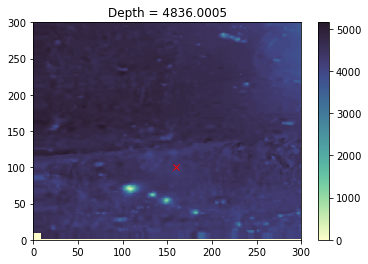

In [203]:
plt.pcolormesh(state_ds.Depth, cmap = cmo.cm.deep)
plt.plot(laty, lonx, 'x', color = 'red')
plt.colorbar()
plt.title('Depth = '+ str(state_ds.Depth[laty, lonx].data))

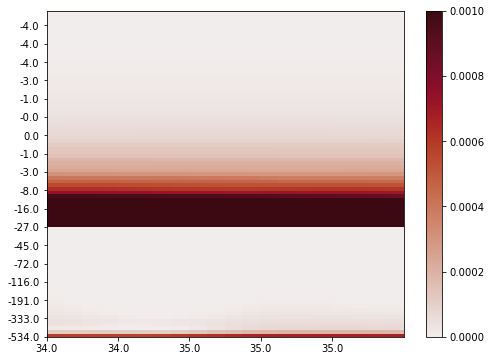

In [204]:
plt.figure(figsize = (8, 6))
latitude_y = LAT[laty:laty+20]
plt.pcolor(Nsquared[:, laty:laty+20, lonx],cmap = cmo.cm.amp, vmin = 0, vmax = 1e-3)
plt.yticks(range(0, 89, 5), np.around(np.flip(Z_mid[0::5, laty, lonx])))
plt.xticks(range(0,20,4), np.around(latitude_y[0::4]))
plt.colorbar()

In [328]:
N2_vector = Nsquared[:-4, laty, lonx].data
Pmid_vector = Pressure_mid[:-4, laty, lonx].data
Zmid_vector = Z_mid[:-4, laty, lonx].data
#Zmid_vector #, N2_vector

# Show where the location is on the map

Text(0.5, 1.0, 'Depth = 3639.5674')

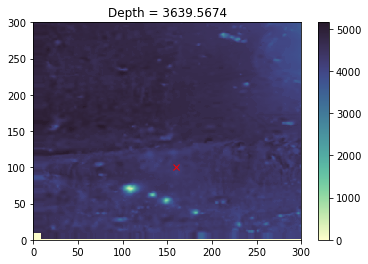

In [329]:
plt.pcolormesh(state_ds.Depth, cmap = cmo.cm.deep)
plt.plot(laty, lonx, 'x', color = 'red')
plt.colorbar()
plt.title('Depth = '+ str(state_ds.Depth[y, x].data))

In [330]:
Pmid_uniform = np.arange(Pmid_vector[0], Pmid_vector[-1], step = 6)
N2_uniform = np.interp(Pmid_uniform, Pmid_vector, N2_vector)

In [331]:
Pmid_vector[-1], Pmid_vector[0], N2_uniform[-1], N2_uniform[0]

(527.025390625,
 4.420801639556885,
 -0.008871802132973191,
 0.0004887062232237203)

In [332]:
Pmid_uniform = Pmid_uniform[:]
N2_uniform = N2_uniform[:]
Pmid_uniform, N2_uniform

(array([  4.42080164,  10.42080164,  16.42080164,  22.42080164,
         28.42080164,  34.42080164,  40.42080164,  46.42080164,
         52.42080164,  58.42080164,  64.42080164,  70.42080164,
         76.42080164,  82.42080164,  88.42080164,  94.42080164,
        100.42080164, 106.42080164, 112.42080164, 118.42080164,
        124.42080164, 130.42080164, 136.42080164, 142.42080164,
        148.42080164, 154.42080164, 160.42080164, 166.42080164,
        172.42080164, 178.42080164, 184.42080164, 190.42080164,
        196.42080164, 202.42080164, 208.42080164, 214.42080164,
        220.42080164, 226.42080164, 232.42080164, 238.42080164,
        244.42080164, 250.42080164, 256.42080164, 262.42080164,
        268.42080164, 274.42080164, 280.42080164, 286.42080164,
        292.42080164, 298.42080164, 304.42080164, 310.42080164,
        316.42080164, 322.42080164, 328.42080164, 334.42080164,
        340.42080164, 346.42080164, 352.42080164, 358.42080164,
        364.42080164, 370.42080164, 376.

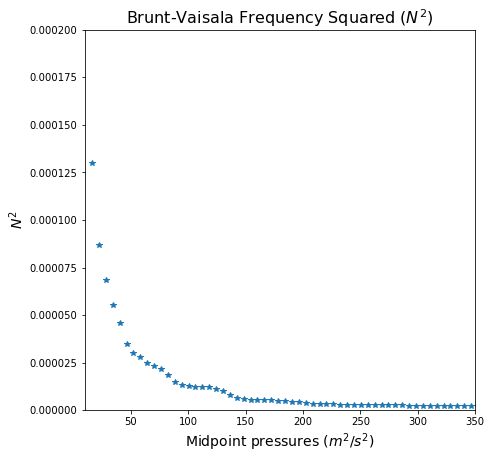

In [333]:
plt.figure(figsize = (7, 7))
plt.title('Brunt-Vaisala Frequency Squared ($N^2$)', fontsize = 16)
plt.plot(  Pmid_uniform[:], N2_uniform, '*')
plt.xlabel('Midpoint pressures (${m^2}/{s^2}$)', fontsize = 14)
plt.ylabel('$N^2$', fontsize = 14)
plt.xlim([10, 350])
plt.ylim([0, 0.0002])
plt.savefig('sample_N2_profile.png')

In [334]:
import VERT_FSFB3

## Interpolate the N2 vector onto a uniform depth grid

## Input: N2, Zmid

In [350]:
#Pmid_uniform = np.arange(Pmid_vector[0], Pmid_vector[-1], step = 6)
#N2_uniform = np.interp(Pmid_uniform, Pmid_vector, N2_vector)

In [392]:
#Zmid_vector = Zmid_vector
Zmid_uniform = np.arange(Zmid_vector[-1], Zmid_vector[0], step = 3)
N2_uniform = np.interp(np.flip(Zmid_uniform), Zmid_vector, N2_vector)
Zmid_uniform, Zmid_vector, N2_uniform

(array([-522.58474736, -519.58474736, -516.58474736, -513.58474736,
        -510.58474736, -507.58474736, -504.58474736, -501.58474736,
        -498.58474736, -495.58474736, -492.58474736, -489.58474736,
        -486.58474736, -483.58474736, -480.58474736, -477.58474736,
        -474.58474736, -471.58474736, -468.58474736, -465.58474736,
        -462.58474736, -459.58474736, -456.58474736, -453.58474736,
        -450.58474736, -447.58474736, -444.58474736, -441.58474736,
        -438.58474736, -435.58474736, -432.58474736, -429.58474736,
        -426.58474736, -423.58474736, -420.58474736, -417.58474736,
        -414.58474736, -411.58474736, -408.58474736, -405.58474736,
        -402.58474736, -399.58474736, -396.58474736, -393.58474736,
        -390.58474736, -387.58474736, -384.58474736, -381.58474736,
        -378.58474736, -375.58474736, -372.58474736, -369.58474736,
        -366.58474736, -363.58474736, -360.58474736, -357.58474736,
        -354.58474736, -351.58474736, -348.58474

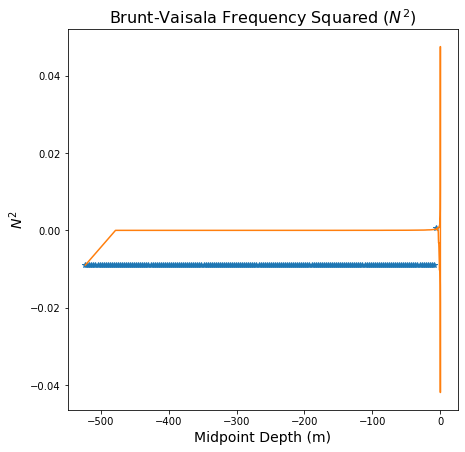

In [393]:
plt.figure(figsize = (7, 7))
plt.title('Brunt-Vaisala Frequency Squared ($N^2$)', fontsize = 16)
plt.plot(Zmid_uniform[:], N2_uniform, '*')
plt.plot(Zmid_vector, N2_vector)
plt.xlabel('Midpoint Depth (m)', fontsize = 14)
plt.ylabel('$N^2$', fontsize = 14)
#plt.xlim([10, 350])
#plt.ylim([0, 0.0002])
plt.savefig('sample_N2_profile.png')

In [387]:
c2, Psi, G, N2, Zmid = VERT_FSFB3.VERT_FSFB3(N2_uniform, Zmid_uniform)

In [388]:
#c2, Psi, G, N2, Pmid = VERT_FSFB3.VERT_FSFB3(N2_uniform, Pmid_uniform)

In [389]:
g = 9.81 # gravity

## With a rigid lid assumpsion, SSH = Gm/g, where g is gravity, since hydrastatic pressure p = $rho * g *  SSH$

In [363]:
SSH = G/g
SSH.shape

(131, 130)

In [375]:
Z_mid_uniform  = np.append(Zmid, 0)
Z_mid_uniform.shape, N2.shape, Zmid, N2

((131,),
 (130,),
 array([-522.58474736, -518.58474736, -514.58474736, -510.58474736,
        -506.58474736, -502.58474736, -498.58474736, -494.58474736,
        -490.58474736, -486.58474736, -482.58474736, -478.58474736,
        -474.58474736, -470.58474736, -466.58474736, -462.58474736,
        -458.58474736, -454.58474736, -450.58474736, -446.58474736,
        -442.58474736, -438.58474736, -434.58474736, -430.58474736,
        -426.58474736, -422.58474736, -418.58474736, -414.58474736,
        -410.58474736, -406.58474736, -402.58474736, -398.58474736,
        -394.58474736, -390.58474736, -386.58474736, -382.58474736,
        -378.58474736, -374.58474736, -370.58474736, -366.58474736,
        -362.58474736, -358.58474736, -354.58474736, -350.58474736,
        -346.58474736, -342.58474736, -338.58474736, -334.58474736,
        -330.58474736, -326.58474736, -322.58474736, -318.58474736,
        -314.58474736, -310.58474736, -306.58474736, -302.58474736,
        -298.58474736, -294.58

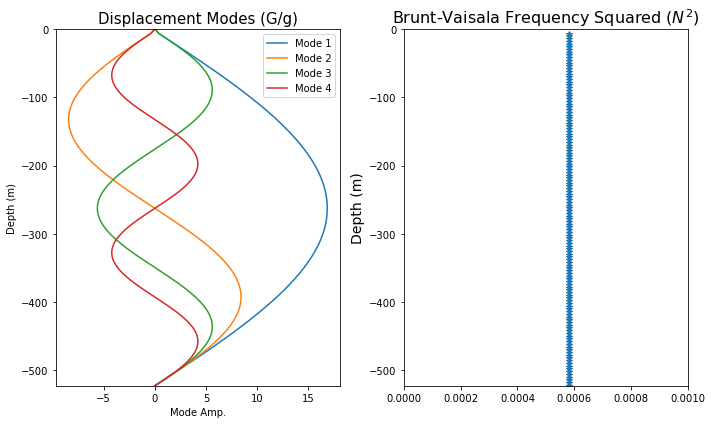

In [373]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(SSH[:,0], Z_mid_uniform, label = 'Mode 1')
plt.plot(SSH[:,1], Z_mid_uniform, label = 'Mode 2')
plt.plot(SSH[:,2], Z_mid_uniform, label = 'Mode 3')
plt.plot(SSH[:,3], Z_mid_uniform, label = 'Mode 4')
#plt.plot(SSH[:,4], Z_mid_uniform, label = 'Mode 5')
plt.xlabel('Mode Amp.')
plt.ylabel('Depth (m)')
#plt.xlim([-.2, .2])
plt.ylim([Z_mid_uniform.min(), 0])
plt.legend()
plt.title('Displacement Modes (G/g)', fontsize = 15)

plt.subplot(122)
plt.title('Brunt-Vaisala Frequency Squared ($N^2$)', fontsize = 16)
plt.plot(N2, Zmid_uniform, '*')
#plt.plot(Pmid_vector[:], N2_vector,  linewidth  = 2.0)
#plt.xlabel('Midpoint pressures (${m^2}/{s^2}$)', fontsize = 14)
plt.ylabel('Depth (m)', fontsize = 14)
plt.xlim([-1e-6, 1e-3])
plt.ylim([Z_mid_uniform.min(), 0])

plt.tight_layout()
plt.savefig('vertical_modes_N2_sample_CCS_lon_' + str(lonx) + '_lat_' + str(laty) +'.png')

In [366]:
MODE = G.shape[-1]

In [367]:
Zgrid, mode = np.meshgrid(Z_mid_uniform, range(MODE) )

In [368]:
mode.shape, Zgrid.shape, SSH[:].shape

((130, 131), (130, 131), (131, 130))

/var/folders/4w/wvmyk9216kl39tqqrtqcndl80000gn/T/ipykernel_14791/1841351753.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(mode, Zgrid, SSH[:].T, cmap = cmo.cm.balance)
/var/folders/4w/wvmyk9216kl39tqqrtqcndl80000gn/T/ipykernel_14791/1841351753.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(mode, Zgrid,G[:].T, cmap = cmo.cm.curl)
/var/folders/4w/wvmyk9216kl39tqqrtqcndl80000gn/T/ipykernel_14791/1841351753.py:25: Matplotlib

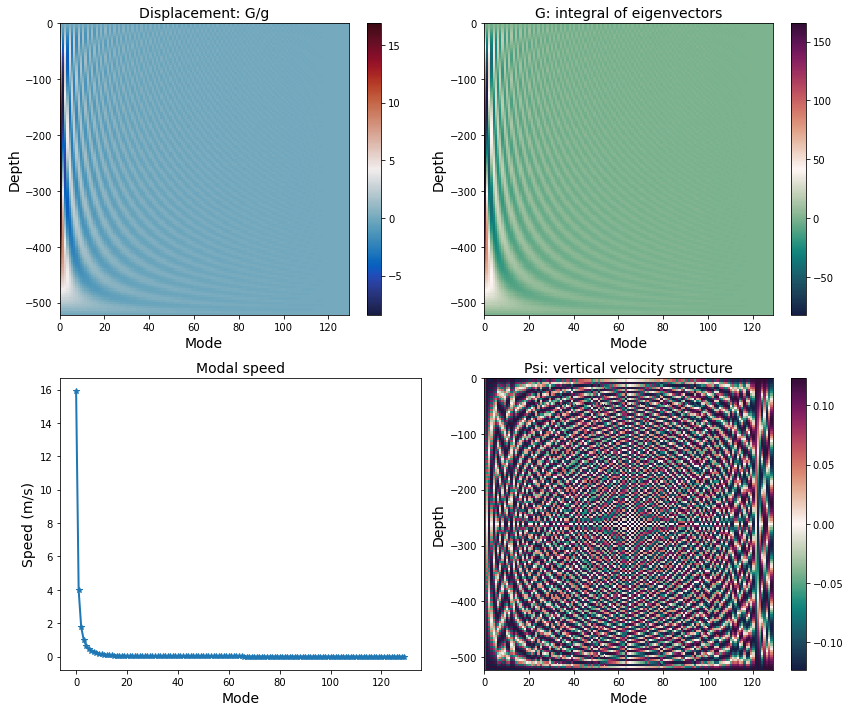

In [369]:
plt.figure(figsize = (12, 10))
plt.subplot(221)
plt.title('Displacement: G/g', fontsize = 14)
plt.pcolormesh(mode, Zgrid, SSH[:].T, cmap = cmo.cm.balance)
plt.ylabel('Depth', fontsize = 14)
plt.xlabel('Mode', fontsize = 14)
plt.colorbar()

plt.subplot(222)
plt.title('G: integral of eigenvectors', fontsize = 14)
plt.pcolor(mode, Zgrid,G[:].T, cmap = cmo.cm.curl)
plt.ylabel('Depth', fontsize = 14)
plt.xlabel('Mode', fontsize = 14)
plt.colorbar()

plt.subplot(223)
plt.title('Modal speed' , fontsize = 14)
plt.plot(c2[:], "-*", linewidth = 2)
plt.ylabel('Speed (m/s)', fontsize = 14)
plt.xlabel('Mode', fontsize = 14)
#plt.colorbar()

plt.subplot(224)
plt.title('Psi: vertical velocity structure' , fontsize = 14)
plt.pcolor(mode, Zgrid, Psi[:].T, cmap = cmo.cm.curl)
plt.ylabel('Depth', fontsize = 14)
plt.xlabel('Mode', fontsize = 14)
plt.colorbar()

plt.tight_layout()
plt.savefig('vertical_modes_FSFB2_N2_sample_lon_' + str(lonx) + '_lat_' + str(laty) +'.png', dpi = 100)